In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [112]:
pd.set_option("max_rows", 20)

In [113]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [114]:
dt = data.copy()

In [115]:
dt.shape

(10000, 20)

In [116]:
dt.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [117]:
dt.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [118]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


#### 1.Удалим строку 'Healthcare_1', поскольку в ней отсутсвуют около половины всех значений.

In [119]:
def rm_healthcare_1(df):
    df = df.drop(['Healthcare_1'], axis=1)
    return df

In [120]:
dt = rm_healthcare_1(dt)

In [121]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


##### 2. Также отсутствует около четверти всех значений "LifeSquare". Как мне кажется, эти значения можно взять из "Square", взяв среднее соотношение между жилой и общей площадьми. Для начала проверим все выбросы по площади квартир.

##### 2.1 Проверим все квартиры площадь которых меньше 20 кв.

In [122]:
dt.loc[dt['Square']< 20]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
1891,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,B,B,25,4756,16,5,8,B,88871.750230
3166,15127,150,1.0,17.046188,20.036232,8.0,7,12.0,1982,0.300323,B,B,52,10311,6,1,9,B,74222.110465
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
3794,523,101,1.0,18.509177,15.170851,3.0,5,5.0,1970,0.225825,A,B,41,6558,7,3,2,B,115845.861527
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798


####  2.2 В списке присутсвтуют квартиры и по 13-20 кв.м, которые, вероятно, представляют из себя квартиры студии или коммуналки. Все, что меньше 13 кв.м. можно убрать как не представляющие из себя интерес. 

In [123]:
def rm_small_flats(df):
    df = df[df.Square > 13]
    return df

In [124]:
dt = rm_small_flats(dt)

#### 2.3 Проверим все квартиры, Жилая площадь которых больше общей площади. Здесь я допустил вариант, при котором человек попросту перепутал поля ввода. Для этого поменяем местами эти значения. 

In [125]:
def swap_square_lifesquare(df):
    dt.loc[dt['LifeSquare'] > dt['Square'], ['Square', 'LifeSquare']] = \
    dt.loc[dt['LifeSquare'] > dt['Square'], ['LifeSquare', 'Square']].values
    return(df)

In [126]:
dt = swap_square_lifesquare(dt)

In [127]:
dt.loc[dt['LifeSquare'] > dt['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [128]:
dt.shape

(9988, 19)

In [129]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9988.000000,9988.000000,9988.000000,9988.000000,7875.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8382.521526,50.428714,1.891169,57.269405,36.098574,6.279836,8.524329,12.613636,3.992574e+03,0.118869,24.698538,5354.503704,8.046956,1.319984,4.232579,214074.592805
std,4859.601396,43.598871,0.839277,77.339018,19.344934,28.577445,5.233997,6.770968,2.006207e+05,0.119058,17.530997,4006.425612,23.845030,1.493597,4.807381,92772.458841
min,0.000000,0.000000,0.000000,15.988889,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.750000,20.000000,1.000000,41.882259,22.801159,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153891.653482
50%,8393.500000,36.000000,2.000000,52.665690,32.784434,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.500000,75.000000,2.000000,66.005696,45.048935,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249100.769116
max,16798.000000,209.000000,19.000000,7480.592129,638.163193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


#### 2.4 Проверим все квартиры с ненормально большой квадратурой. 

In [130]:
dt.loc[dt['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,263.542020,48.449873,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4328,16550,27,3.0,7480.592129,81.694417,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4690,2307,102,1.0,410.639749,409.425181,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
8437,15886,85,3.0,461.463614,78.059331,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978
9910,16568,27,4.0,201.627361,200.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


In [131]:
dt.loc[dt['LifeSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4690,2307,102,1.0,410.639749,409.425181,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
9910,16568,27,4.0,201.627361,200.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


In [132]:
dt.loc[dt['KitchenSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


In [133]:
def reduce_abnormal_squares(df):
    df.loc[df['Square'] > 1000,['Square']]=df.loc[df['Square'] > 1000, ['Square']]*0.01
    df.loc[df['LifeSquare'] > 1000,['LifeSquare']]=df.loc[df['LifeSquare'] > 1000, ['LifeSquare']]*0.01
    df.loc[df['KitchenSquare'] > 1000,['KitchenSquare']]=df.loc[df['KitchenSquare'] > 1000, ['KitchenSquare']]*0.01
    dt.loc[dt['KitchenSquare'] > dt['Square'], ['KitchenSquare']] = \
    dt.loc[dt['KitchenSquare'] > dt['Square'], ['KitchenSquare']]*0.1
    return df

In [134]:
dt = reduce_abnormal_squares(dt)

#### 2.5 Проверим все квартиры, где жилая площадь менее 11 квадратов или неизвестна. Эти значения можно взять из "Square", взяв среднее соотношение между жилой и общей площадьми остальной выборки.

In [135]:
dt.loc[(dt['LifeSquare'] < 11) | (dt['LifeSquare'].isnull())]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,244145.827069
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,0,0,A,337299.867936
27,7550,23,2.0,64.556209,NaN,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,173910.923723
36,11703,23,1.0,41.118766,NaN,1.0,4,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,103510.223601
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,0,0,B,229778.057902
43,175,23,2.0,58.692133,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,184501.011225


In [136]:
def adjust_life_square(df, s_df):
    ls_coef = (s_df.loc[(s_df['LifeSquare'] >= 11) | (s_df['LifeSquare'].notnull()), 'LifeSquare'].mean())/\
              (s_df.loc[(dt['LifeSquare'] >= 11) | (s_df['LifeSquare'].notnull()),'Square'].mean())
    df.loc[(df['LifeSquare'] < 11) | (df['LifeSquare'].isnull()), 'LifeSquare']=\
    df.loc[(df['LifeSquare'] < 11) | (df['LifeSquare'].isnull()), 'Square'] * ls_coef
    return df

In [137]:
dt = adjust_life_square(dt, dt)

In [138]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 19 columns):
Id               9988 non-null int64
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null int64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null object
Ecology_3        9988 non-null object
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null object
Price            9988 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.5+ MB


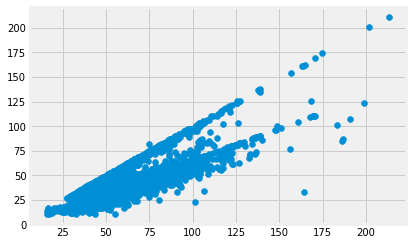

In [139]:
plt.scatter(dt.loc[dt['Square'] < 250, 'Square'],
            dt.loc[dt['Square'] < 250, 'LifeSquare']);

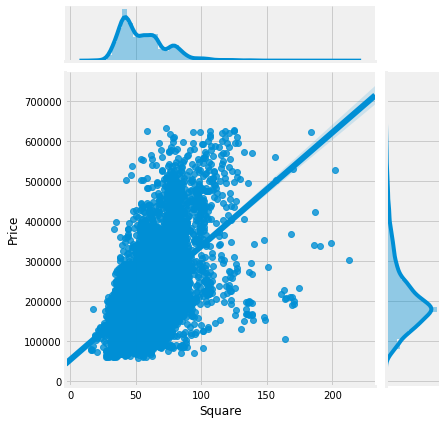

In [140]:
sns.jointplot(dt.loc[dt['Square']<250,'Square'],
            dt.loc[dt['Square']<250,'Price'],kind='reg');

#### 3. Проверим значения этажности квартир, сопоставим их со значением этажности дома. 

In [141]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8382.521526,50.428714,1.891169,56.527937,37.467461,5.870799,8.524329,12.613636,3.992574e+03,0.118869,24.698538,5354.503704,8.046956,1.319984,4.232579,214074.592805
std,4859.601396,43.598871,0.839277,21.518819,18.000355,5.074437,5.233997,6.770968,2.006207e+05,0.119058,17.530997,4006.425612,23.845030,1.493597,4.807381,92772.458841
min,0.000000,0.000000,0.000000,15.988889,10.482675,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.750000,20.000000,1.000000,41.882259,25.660261,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153891.653482
50%,8393.500000,36.000000,2.000000,52.665690,33.865425,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.500000,75.000000,2.000000,66.005696,45.232439,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249100.769116
max,16798.000000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [142]:
dt.loc[dt['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
8599,9300,74,2.0,74.579809,71.747869,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
8854,78,30,2.0,66.811789,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520


#### 3.1 Скорее всего, обычная опечатка оператора. Уберем дублирующиеся цифры 

In [143]:
dt.loc[dt['HouseFloor'] == 99, ['HouseFloor']] = 9

In [144]:
dt.loc[dt['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,66.811789,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.37052


In [145]:
dt.loc[dt['HouseFloor'] == 117, ['HouseFloor']] = 17

In [146]:
dt.loc[dt['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [147]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8382.521526,50.428714,1.891169,56.527937,37.467461,5.870799,8.524329,12.585603,3.992574e+03,0.118869,24.698538,5354.503704,8.046956,1.319984,4.232579,214074.592805
std,4859.601396,43.598871,0.839277,21.518819,18.000355,5.074437,5.233997,6.577555,2.006207e+05,0.119058,17.530997,4006.425612,23.845030,1.493597,4.807381,92772.458841
min,0.000000,0.000000,0.000000,15.988889,10.482675,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.750000,20.000000,1.000000,41.882259,25.660261,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153891.653482
50%,8393.500000,36.000000,2.000000,52.665690,33.865425,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.500000,75.000000,2.000000,66.005696,45.232439,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249100.769116
max,16798.000000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,48.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [148]:
dt.loc[dt['Floor'] > dt['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,52.235915,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,7.215758e-02,B,B,2,629,1,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,5.181543e-02,B,B,5,1227,0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,42.088890,1.0,15,1.0,1977,2.114012e-01,B,B,9,1892,0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,77.338085,0.0,2,0.0,1977,6.076152e-03,B,B,30,5285,0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,69.566566,0.0,17,0.0,2018,7.215758e-02,B,B,2,629,1,0,0,A,337299.867936
35,6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.000000e+00,B,B,33,7425,1,2,5,B,402871.916317
39,9371,23,2.0,60.503248,39.351605,0.0,16,0.0,1977,3.465608e-02,B,B,0,168,0,0,0,B,229778.057902
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,6.075305e-02,B,B,15,2787,2,0,7,B,435462.048070
51,10103,94,1.0,35.280894,23.354176,6.0,11,9.0,1971,2.827977e-01,B,B,33,8667,2,0,6,B,148862.210174


#### 3.2 Для всех нулевых значений Этажности дома я решил приравнять Этажность Дома к 1. А для всех остальных наблюдений поменять местами значения, допуская, что была допущена ошибка оператором. 

In [149]:
def fix_house_floor(df):
    df.loc[df['HouseFloor'] == 0, ['HouseFloor']] = 1
    df.loc[df['Floor'] > df['HouseFloor'], ['Floor', 'HouseFloor']] = \
    df.loc[df['Floor'] > df['HouseFloor'], ['HouseFloor', 'Floor']].values
    return df

#### 3.3 Предполагаю, что цены на квартиру на первом-втором этажах будут слегка дешевле.

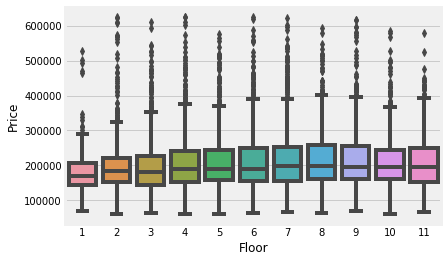

In [150]:
sns.boxplot(x=dt.loc[dt['Floor']<12, 'Floor'], y=dt.loc[dt['Floor']<12, 'Price']);

#### 4.1 Рассмотрим года выпуска домов и исправим очевидные опечатки.

In [151]:
dt['HouseYear'].value_counts()

1977        2643
2017         308
2016         304
2015         299
2014         209
1970         194
1969         190
1972         178
1971         177
2018         175
            ... 
1932           2
1948           2
1941           2
4968           1
1914           1
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [152]:
dt.loc[dt['HouseYear'] == 4968, ['HouseYear']] = 1968

In [153]:
dt.loc[dt['HouseYear'] == 20052011, ['HouseYear']] = 2005

In [154]:
dt['HouseYear'].value_counts()

1977    2643
2017     308
2016     304
2015     299
2014     209
1970     194
1969     190
1972     178
1971     177
2018     175
        ... 
1912       2
1929       2
1932       2
1948       2
1941       2
1914       1
1947       1
1910       1
1928       1
1916       1
Name: HouseYear, Length: 95, dtype: int64

#### 5.1 Проверим аномалии в количестве комнат.

In [155]:
dt['Rooms'].value_counts()

2.0     3879
1.0     3697
3.0     2233
4.0      150
5.0       18
0.0        7
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [156]:
dt.loc[dt['Rooms'] > 9]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


#### 5.2 Судя по всему, все три квартиры однокомнатные. 

In [157]:
dt.loc[dt['Rooms'] > 9, ['Rooms']] = 1

In [158]:
dt['Rooms'].value_counts()

2.0    3879
1.0    3700
3.0    2233
4.0     150
5.0      18
0.0       7
6.0       1
Name: Rooms, dtype: int64

#### 6. Добавим дополнительный столбец со средней ценой по району

In [159]:
def join_stats1(df,stats1,s_df,mode='train'):
    df=pd.merge(df,stats1,on=['DistrictId','Rooms'],how='left')
    if mode=='test':
        df['Mean_price']=df['Mean_price'].fillna(s_df['Mean_price'].mean())
    return df

In [160]:
stats1=dt.groupby(['DistrictId','Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'Mean_price'})

In [161]:
stats1

,DistrictId,Rooms,Mean_price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147053.553961
4,1,2.0,198777.278269
5,1,3.0,246330.217412
6,1,4.0,277290.705058
7,2,1.0,177871.758149
8,2,2.0,243022.112038
9,2,3.0,342699.342039


In [162]:
dt = join_stats1(dt,stats1,dt)

In [163]:
dt.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,0,11,B,184966.930730,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,1,16,B,300009.450063,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.227217,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2,4,B,150226.531644,155748.415754


#### 7. Разделим категориальные переменные на отдельные столбцы

In [164]:
dt.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
Mean_price       float64
dtype: object

In [165]:
dt['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [166]:
dt['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [167]:
pd.options.display.max_columns=len(dt.columns)+10
dt=pd.get_dummies(dt)

In [168]:
dt.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
                  ...   
Helthcare_2        int64
Shops_1            int64
Price            float64
Mean_price       float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
Length: 23, dtype: object

In [169]:
dt['DistrictId'].nunique()

205

In [170]:
dt.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Mean_price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,213160.076297,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,303643.563728,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,259938.729121,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,172368.882269,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,155748.415754,0,1,0,1,0,1


#### 8.1 Разобьем наш датасет на тренировочный и валидационный, затем обучим модель.

In [171]:
train, valid = train_test_split(dt, test_size=0.30, random_state=42)

In [172]:
train.shape, valid.shape

((6991, 23), (2997, 23))

In [173]:
from sklearn.ensemble import RandomForestRegressor as RF

In [174]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Mean_price',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B'],
      dtype='object')

In [175]:
features = ['DistrictId','Rooms','Square','LifeSquare','KitchenSquare',
             'Floor', 'HouseFloor', 'HouseYear', 'Mean_price',
             'Ecology_2_A','Ecology_2_B', 'Ecology_3_A', 
             'Ecology_3_B','Shops_2_A','Shops_2_B']

#### 8.2 Используем gridsearch для поиска оптимальных параметров обучения

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
params={
        'min_samples_leaf':[5,7,10,12],
        'n_estimators':[75,100,125],
        'max_depth':[7,10,12]
        }
regr=GridSearchCV(RF(),param_grid=params, cv=2)

In [178]:
%%time
regr.fit(train.loc[:, features], train['Price'])

CPU times: user 55.1 s, sys: 89 ms, total: 55.2 s
Wall time: 55.3 s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [5, 7, 10, 12], 'n_estimators': [75, 100, 125], 'max_depth': [7, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [179]:
regr.best_params_

{'max_depth': 12, 'min_samples_leaf': 5, 'n_estimators': 125}

In [180]:
regr.best_score_

0.7393129687578595

In [181]:
model_RF=RF(n_estimators=125,max_depth=12,min_samples_leaf=5)

In [182]:
model_RF.fit(train.loc[:, features], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [183]:
pred_train = model_RF.predict(train.loc[:, features])

In [184]:
pred_train.shape

(6991,)

In [185]:
pred_valid = model_RF.predict(valid.loc[:, features])

In [186]:
pred_valid.shape

(2997,)

In [187]:
from sklearn.metrics import r2_score as r2

In [188]:
r2(train['Price'], pred_train)

0.8672488724152544

In [189]:
r2(valid['Price'], pred_valid)

0.7484790523058462

#### 9. Проверим тестовый датасет и применим к нему те же функции

In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [191]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [192]:
test = swap_square_lifesquare(test)
test = reduce_abnormal_squares(test)
test = adjust_life_square(test, dt)
test = fix_house_floor(test)

In [193]:
test = join_stats1(test, stats1, dt, mode='test')

In [194]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
Mean_price       5000 non-null float64
dtypes: float64(9), int64(8), object(3)
memory usage: 820.3+ KB


In [195]:
test=pd.get_dummies(test)

In [196]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Mean_price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,37.805084,5.976800,7.86420,13.395000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,214185.462610,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,4832.674037,44.179466,0.838594,19.092787,16.389355,9.950018,5.41956,6.231945,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,71444.547544,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.913688,0.000000,1.00000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,84250.557673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,26.036361,1.000000,4.00000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,166014.055413,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,34.310735,6.000000,7.00000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,198777.278269,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.799505,9.000000,11.00000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,246330.217412,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,46.00000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,593618.746096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Mean_price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,11,2748,1,NaN,0,0,172368.882269,0,1,0,1,0,1
1,15856,74,2.0,69.263183,45.907146,1.0,1.0,6.0,1977,0.075779,6,1437,3,NaN,0,2,236250.931918,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,30,7538,87,4702.0,5,5,214074.592805,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,23,4583,3,NaN,3,3,206507.966738,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,2,629,1,NaN,0,0,122816.960701,0,1,0,1,1,0


In [198]:
y_result = pd.Series(model_RF.predict(test.loc[:, features]))

In [199]:
len(y_result)

5000

In [200]:
test.shape[0]

5000

In [201]:
result = pd.concat([test['Id'], y_result], axis=1).rename(columns={0:'Price'})

In [202]:
result.to_csv('DVasilyev_predictions.csv',index=None)

In [203]:
result.describe()

,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,213140.878334
std,4832.674037,75404.807284
min,1.000000,66013.710338
25%,4221.750000,165198.808315
50%,8320.500000,195013.377823
75%,12598.250000,246053.200722
max,16795.000000,551718.479120
